In [ ]:
!pip install catboost -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:

model = CatBoostRegressor(task_type = 'GPU', verbose=False)

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [6, 8, 10],
    'iterations': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=20, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)
y_train_pred= best_model.predict(X_train)




train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

#tap kiem tra
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Tap huan luyen : ")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R-squared:", train_r2)
print("**************")
print("Tap kiem tra: ")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R-squared:", test_r2)



Best Parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.05}
Tap huan luyen : 
MSE: 0.005402905361124411
RMSE: 0.07350445810373961
R-squared: 0.9665378636374486
**************
Tap kiem tra: 
MSE: 0.018118948213887882
RMSE: 0.1346066425325581
R-squared: 0.8803238630358234


Text(0.5, 1.0, 'Histogram of y_pred')

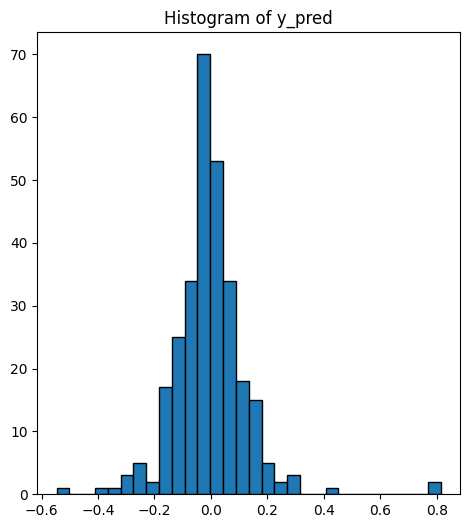

In [ ]:
import matplotlib.pyplot as plt
df_y_pred = pd.DataFrame(y_test_pred, columns=['y_pred'])
error = df_y_pred['y_pred'].values - y_test['SalePrice'].values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(error, bins=30, edgecolor='k')
plt.title('Histogram of y_pred')

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting type': 'gdbt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
}


gbm = lgb.train(params,
                train_data,
                num_boost_round=200,
                valid_sets=test_data,)



y_train_pred = gbm.predict(X_train)
y_test_pred_lgb = gbm.predict(X_test)


train_mse_lgb = mean_squared_error(y_train, y_train_pred)
train_rmse_lgb = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2_lgb = r2_score(y_train, y_train_pred)

#tap kiem tra
test_mse_lgb = mean_squared_error(y_test, y_test_pred)
test_rmse_lgb = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2_lgb = r2_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Tap huan luyen : ")
print("MSE:", train_mse_lgb)
print("RMSE:", train_rmse_lgb)
print("R-squared:", train_r2_lgb)
print("**************")
print("Tap kiem tra: ")
print("MSE:", test_mse_lgb)
print("RMSE:", test_rmse_lgb)
print("R-squared:", test_r2_lgb)

[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Best Parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.05}
Tap huan luyen : 
MSE: 0.002415677872277846
RMSE: 0.04914954600276432
R-squared: 0.9850388380015347
**************
Tap kiem tra: 
MSE: 0.017118964955220577
RMSE: 0.1308394625303107
R-squared: 0.8869287791718728


Text(0.5, 1.0, 'Histogram of y_pred')

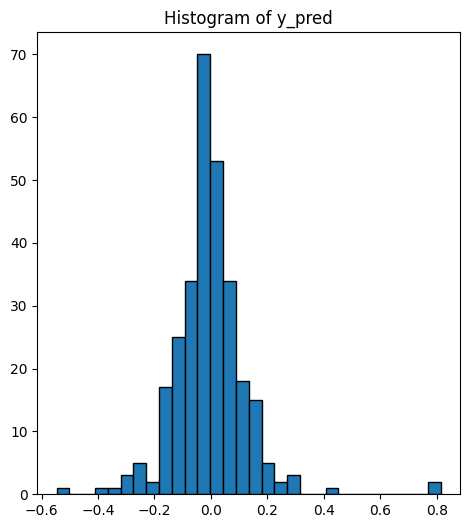

In [ ]:
import matplotlib.pyplot as plt
df_y_pred = pd.DataFrame(y_test_pred_lgb, columns=['y_pred'])
error = df_y_pred['y_pred'].values - y_test['SalePrice'].values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(error, bins=30, edgecolor='k')
plt.title('Histogram of y_pred')